# Exploratory Data Analysis with Titanic dataset




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb #sane defaults for matplotlib

In [2]:
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
# we need below line for displaying graphis inline (in  a notebook)
%matplotlib inline

In [3]:
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

In [4]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
train_data.shape

(891, 12)

In [7]:
test_data.shape

(418, 11)

In [8]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
test_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
# we can find the missing column in train_data
set(train_data.columns).difference(set(test_data.columns))

{'Survived'}

In [9]:
# we can unique columsn in BOTH dataframes
set(test_data.columns).symmetric_difference(set(train_data.columns))

{'Survived'}

In [10]:
set(test_data.columns).difference(set(train_data.columns))

set()

In [11]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [12]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
# we can describe non numerical data (ie objects here)
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Robbins, Mr. Victor",male,347082,B96 B98,S
freq,1,577,7,4,644


In [14]:
# we can uniques using Python set operation
set(train_data['Embarked'])

{'C', 'Q', 'S', nan}

In [16]:
train_data["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [13]:
# we can uniques using Python set operation
set(train_data)

{'Age',
 'Cabin',
 'Embarked',
 'Fare',
 'Name',
 'Parch',
 'PassengerId',
 'Pclass',
 'Sex',
 'SibSp',
 'Survived',
 'Ticket'}

In [17]:
myalphatrain = train_data[sorted(list(set(train_data)))]
myalphatrain.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450


In [20]:
sorted(train_data.columns, reverse=True)

['Ticket',
 'Survived',
 'SibSp',
 'Sex',
 'Pclass',
 'PassengerId',
 'Parch',
 'Name',
 'Fare',
 'Embarked',
 'Cabin',
 'Age']

In [18]:
myalphatrain = train_data[sorted(train_data.columns)]
myalphatrain.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450


In [15]:
# we can sort columns alphabetically 
sortedbycolumn = train_data[sorted(train_data.columns)]
sortedbycolumn.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450


In [16]:
#we can get uniques in numpy ndarray
train_data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [17]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [21]:
# we can find out the missing data fields
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

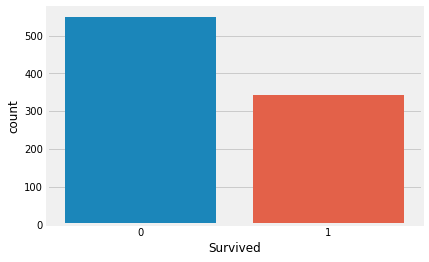

In [22]:
# we can look at survival data using sb.countplot
sb.countplot('Survived',data=train_data)
plt.show()

In [23]:
train_data['Survived'].describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [20]:
len(train_data[train_data['Survived'] == 1])/len(train_data)

0.3838383838383838

In [24]:
survivors = train_data[train_data['Survived'] == 1]
survivors.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


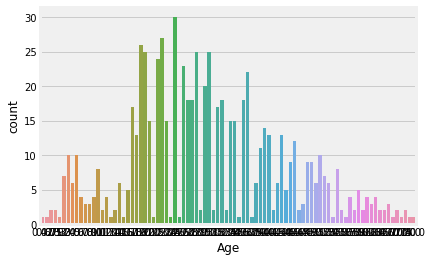

In [25]:
sb.countplot('Age',data=train_data)
plt.show()

From the above graph it is clear that not many persons survived.
Out of 891 persons in training dataset only 350, 38.4% of total training dataset survived. We will get more insight of data by exploring more.

Here we'll explore features

In [26]:
# we can group by multiple columns
grouped = train_data.groupby(['Sex', 'Survived'])['Survived'].count()
grouped

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [27]:
type(train_data.groupby(['Sex', 'Survived'])['Survived'].count())

pandas.core.series.Series

In [28]:
grouped['female']

Survived
0     81
1    233
Name: Survived, dtype: int64

In [29]:
# when we have multiple indexes
grouped[['male']][0]

468

It is clear that 233 female survived out of 344. And out of 577 male 109 survived. The survival ratio of female is much greater than that of male. It can be seen clearly in following graph

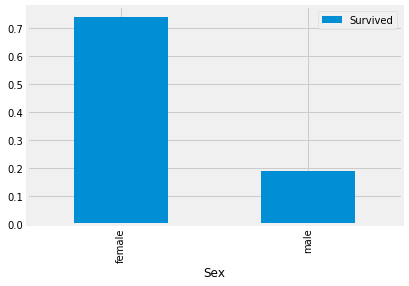

In [30]:
train_data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar()
plt.show()

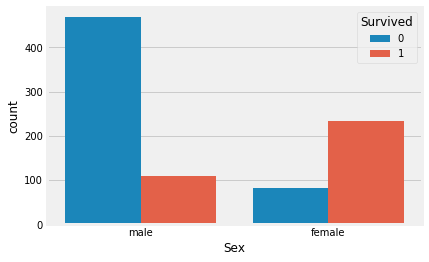

In [31]:
#train_data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar()
sb.countplot('Sex',hue='Survived',data=train_data)
plt.show()

'Sex' is very interesting feature. Isn't it? Let's explore more features

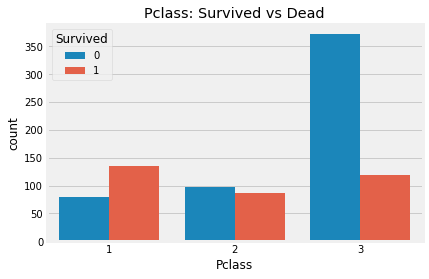

In [32]:
# Pclass is a column name and we color by another column 'Survived'
sb.countplot('Pclass', hue='Survived', data=train_data)
plt.title('Pclass: Survived vs Dead')
plt.show()

In [33]:
train_data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [35]:
# we can use backslash \ to show one line over multiple lines
# otherwise Python will be confused by blank space!
fem2 = train_data[(train_data['Sex'] == 'female') \
                  & (train_data['Pclass'] == 2)]
fem2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
41,42,0,2,"Turpin, Mrs. William John Robert (Dorothy Ann ...",female,27.0,1,0,11668,21.0000,NaN,S
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.0,1,2,SC/Paris 2123,41.5792,NaN,C
53,54,1,2,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",female,29.0,1,0,2926,26.0000,NaN,S


In [36]:
len(fem2)

76

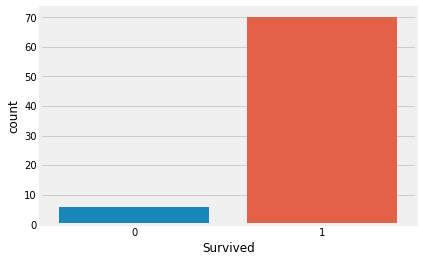

In [38]:
sb.countplot('Survived',data=fem2)

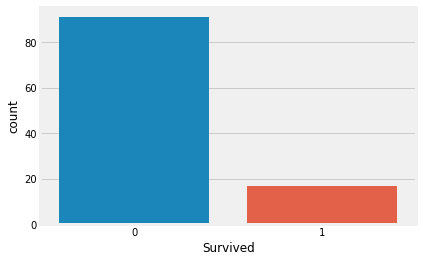

In [39]:
sb.countplot('Survived',data=m2)

In [37]:
m2 = train_data[(train_data['Sex'] == 'male') \
                  & (train_data['Pclass'] == 2)]
m2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0,NaN,S
20,21,0,2,"Fynney, Mr. Joseph J",male,35.0,0,0,239865,26.0,NaN,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0,D56,S
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5,NaN,S
70,71,0,2,"Jenkin, Mr. Stephen Curnow",male,32.0,0,0,C.A. 33111,10.5,NaN,S


Wow.... That looks amazing. It is usually said that Money can't buy Everything, But it is clearly seen that pasangers of Class 1 are given high priority while Rescue. There are greater number of passangers in Class 3 than Class 1 and Class 2 but very few, almost 25% in Class 3 survived. In Class 2, survivail and non-survival rate is 49% and 51% approx.
While in Class 1 almost 68% people survived. So money and status matters here.

Let's dive in again into data to check more interesting observations.

In [48]:
ctab = pd.crosstab([train_data['Sex'],train_data['Survived']],\
                   train_data.Pclass,margins=True)\
.style.background_gradient(cmap="plasma")
ctab

In [49]:
ctab.index

MultiIndex(levels=[['All', 'female', 'male'], [0, 1, '']],
           codes=[[1, 1, 2, 2, 0], [0, 1, 0, 1, 2]],
           names=['Sex', 'Survived'])

In [32]:
ctab.columns

Index([1, 2, 3, 'All'], dtype='object', name='Pclass')

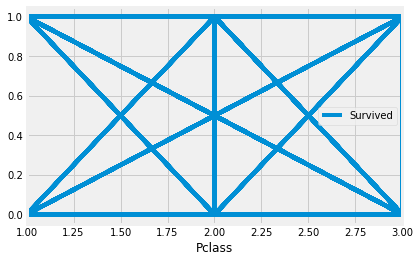

In [53]:
train_data.plot('Pclass','Survived')

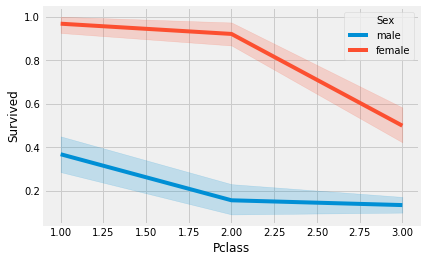

In [51]:
sb.lineplot('Pclass', 'Survived', hue='Sex', data=train_data)

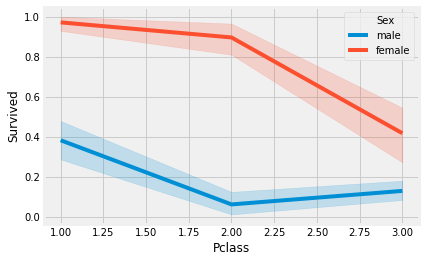

In [54]:
sb.lineplot('Pclass', 'Survived', hue='Sex', data=train_data[train_data['Age'] > 20])

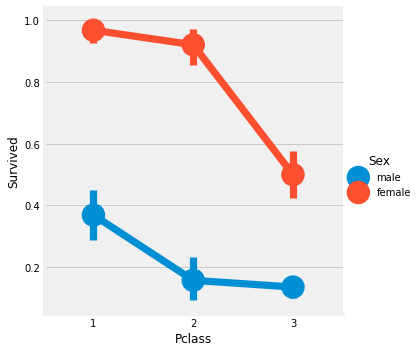

In [50]:
sb.factorplot('Pclass', 'Survived', hue='Sex', data=train_data)
plt.show()

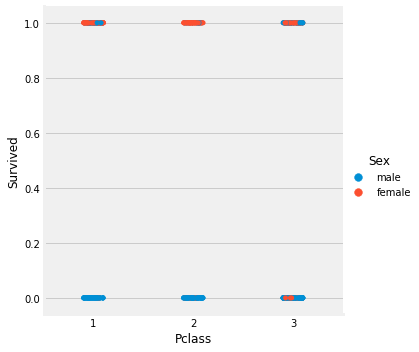

In [55]:
sb.catplot('Pclass', 'Survived', hue='Sex', data=train_data)
plt.show()

I use FactorPlot and CrossTab here because with these plots categorical variables can easily be visualized. Looking at FactorPlot and CrossTab, it is clear that women survival rate in Class 1 is about 95-96%, as only 3 out of 94 women died. So, it is now more clear that irrespective of Class, women are given first priority during Rescue. Because survival rate for men in even Class 1 is also very low.
From this conclusion, PClass is also a important feature.

In [57]:
print('Oldest person Survived was of:',train_data['Age'].max())
print('Youngest person Survived was of:',train_data['Age'].min())
print('Average person Survived was of:',train_data['Age'].mean())

Oldest person Survived was of: 80.0
Youngest person Survived was of: 0.42
Average person Survived was of: 29.69911764705882


In [58]:
train_data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [59]:
[q*0.1 for q in range(10)]

[0.0,
 0.1,
 0.2,
 0.30000000000000004,
 0.4,
 0.5,
 0.6000000000000001,
 0.7000000000000001,
 0.8,
 0.9]

In [61]:
train_data['Age'].quantile([q*0.1 for q in range(11)])

0.0     0.42
0.1    14.00
0.2    19.00
0.3    22.00
0.4    25.00
0.5    28.00
0.6    31.80
0.7    36.00
0.8    41.00
0.9    50.00
1.0    80.00
Name: Age, dtype: float64

In [62]:
train_data['Age'].quantile(np.linspace(0,1,21))

0.00     0.420
0.05     4.000
0.10    14.000
0.15    17.000
0.20    19.000
0.25    20.125
0.30    22.000
0.35    24.000
0.40    25.000
0.45    27.000
0.50    28.000
0.55    30.000
0.60    31.800
0.65    34.000
0.70    36.000
0.75    38.000
0.80    41.000
0.85    45.000
0.90    50.000
0.95    56.000
1.00    80.000
Name: Age, dtype: float64

In [65]:
train_data['Age'].quantile(np.arange(0.1,1.1,0.1))

0.1    14.0
0.2    19.0
0.3    22.0
0.4    25.0
0.5    28.0
0.6    31.8
0.7    36.0
0.8    41.0
0.9    50.0
1.0    80.0
Name: Age, dtype: float64

In [66]:
survivors = train_data[train_data["Survived"] == 1]
survivors.shape

(342, 12)

In [67]:
survivors.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [68]:
# this returns max for ALL columns seperately 
survivors.max()

PassengerId                        890
Survived                             1
Pclass                               3
Name           de Mulder, Mr. Theodore
Sex                               male
Age                                 80
SibSp                                4
Parch                                5
Ticket                       WE/P 5735
Fare                           512.329
dtype: object

In [69]:
survivors.min()

PassengerId                                   2
Survived                                      1
Pclass                                        1
Name           Abbott, Mrs. Stanton (Rosa Hunt)
Sex                                      female
Age                                        0.42
SibSp                                         0
Parch                                         0
Ticket                                   110152
Fare                                          0
dtype: object

In [27]:
survivors['Age'].max()

80.0

In [78]:
# we can sort by multiple columns and also define how to sort each tiebreak
train_data.sort_values(by=['Fare','Age'],ascending=[False,True]).head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C


In [73]:
bigfam = train_data[(train_data['Parch'] > 4) | (train_data['SibSp'] > 4)]
bigfam

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,NaN,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9000,NaN,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.5500,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.5500,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.5500,NaN,S
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9000,NaN,S
480,481,0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.9000,NaN,S


In [80]:
bigticket = train_data[train_data['Fare'] == train_data['Fare'].max()]
bigticket

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [61]:
# with this we can select the oldest passenger(s)
survivors[survivors['Age'] == survivors['Age'].max()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,A23,S


In [62]:
# with this we can select the oldest passenger(s)
survivors[survivors['Age'] == survivors['Age'].min()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C


In [28]:
survivors['Age'].min()

0.42

In [29]:
survivors.min()


PassengerId                                   2
Survived                                      1
Pclass                                        1
Name           Abbott, Mrs. Stanton (Rosa Hunt)
Sex                                      female
Age                                        0.42
SibSp                                         0
Parch                                         0
Ticket                                   110152
Fare                                          0
dtype: object

In [81]:
# survivors mean should not be equal to all passengers mean
survivors['Age'].mean(), train_data['Age'].mean()

(28.343689655172415, 29.69911764705882)

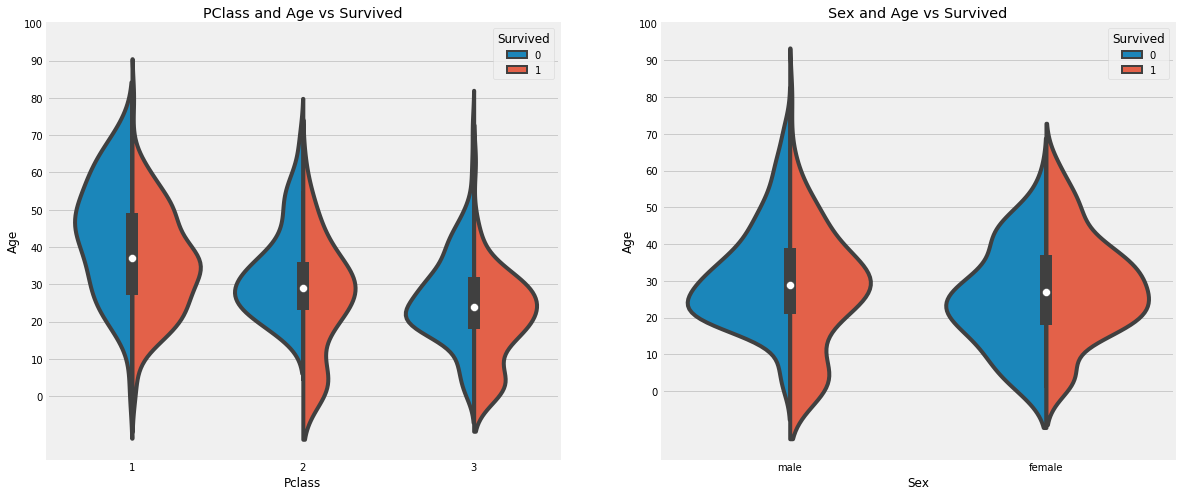

In [82]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sb.violinplot('Pclass','Age',hue='Survived',data=train_data,split=True,ax=ax[0])
ax[0].set_title('PClass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sb.violinplot("Sex","Age", hue="Survived", data=train_data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()


From above violen plots, following observations are clear,
1) The no of children is increasing from Class 1 to 3, the number of children in Class 3 is greater than other two. 
2) Survival rate of children, for age 10 and below is good irrespective of Class
3) Survival rate between age 20-30 is well and is quite better for women.

Now, in Age feature we have 177 null values filled with NaN. We have to deal with it. But we can't enter mean of age in every NaN column, because our average/mean is 29 and we cannot put 29 for a child or some olde man. So we have to discover something better. 
Let's do something more interesting with dataset by exploring more.

What is, if I look at 'Name' feature, It looks interesting. Let's check it....

In [83]:
train_data['Name'][:10]

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [33]:
# this loop looks unneeded
# train_data['Initial']=0
# for i in train_data:
#     train_data['Initial']=train_data.Name.str.extract('([A-Za-z]+)\.') #extracting Name initials

In [84]:
# we can do without loop and create new column immediately
train_data['Title'] = train_data['Name'].str.extract('([A-Za-z]+)\.')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [89]:
train_data['LName'] = train_data['Name'].str.extract('([A-Za-z]+)\,')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,LName
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Allen


In [86]:
# Regex in Python
import re

txt = "The rain in Spain"
txt2 = "The winter in Spain"
x = re.search("^The.*Spain$", txt)
x2 = re.search("^The.*Spain$", txt2)
x, x2

(<re.Match object; span=(0, 17), match='The rain in Spain'>,
 <re.Match object; span=(0, 19), match='The winter in Spain'>)

In [88]:
text = "Bumba tumba satuumba"
x = re.findall("t*mb", text)
print(re.fullmatch("t*mb", text))
x

None


['mb', 'mb', 'mb']

In [74]:
x, x2

(<re.Match object; span=(0, 17), match='The rain in Spain'>,
 <re.Match object; span=(0, 19), match='The winter in Spain'>)

In [83]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ini
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [37]:
train_data['First']=""

In [95]:
train_data['First']=train_data['Name'].str.extract('[A-Za-z]+\. ([A-Za-z]+)') #extracting First Name

In [85]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ini,First
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Owen
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,John
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Laina
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Jacques
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,William


In [86]:
train_data['LastName'] = train_data['Name'].str.extract('^([A-Za-z]+)')

In [87]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ini,First,LastName
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Owen,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,John,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Laina,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Jacques,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,William,Allen
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr,James,Moran
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr,Timothy,McCarthy
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master,Gosta,Palsson
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs,Oscar,Johnson
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs,Nicholas,Nasser


In [29]:
# regexp101 for hints on regular expression
# seperate lecture on regular expression might be in order
# we do not need loops
#for i in train_data:
#    train_data['First']=train_data.Name.str.extract('[A-Za-z]+\. ([A-Za-z]+)') #extracting First Name

In [90]:
train_data["LastName"] = train_data['Name'].str.extract('([A-Za-z]+)\,')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,LName,LastName
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Braund,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Cumings,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Heikkinen,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Futrelle,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Allen,Allen


In [93]:
train_data = train_data.drop('LName', axis=1)

In [94]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,LastName
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Allen


In [96]:
train_data['First'].isnull().sum()

16

In [97]:
train_data[train_data.First.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,LastName,First
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S,Mrs,Hewlett,NaN
66,67,1,2,"Nye, Mrs. (Elizabeth Ramell)",female,29.0,0,0,C.A. 29395,10.5000,F33,S,Mrs,Nye,NaN
166,167,1,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,NaN,0,1,113505,55.0000,E33,S,Mrs,Chibnall,NaN
190,191,1,2,"Pinsky, Mrs. (Rosa)",female,32.0,0,0,234604,13.0000,NaN,S,Mrs,Pinsky,NaN
259,260,1,2,"Parrish, Mrs. (Lutie Davis)",female,50.0,0,1,230433,26.0000,NaN,S,Mrs,Parrish,NaN
272,273,1,2,"Mellinger, Mrs. (Elizabeth Anne Maidment)",female,41.0,0,1,250644,19.5000,NaN,S,Mrs,Mellinger,NaN
327,328,1,2,"Ball, Mrs. (Ada E Hall)",female,36.0,0,0,28551,13.0000,D,S,Mrs,Ball,NaN
362,363,0,3,"Barbara, Mrs. (Catherine David)",female,45.0,0,1,2691,14.4542,NaN,C,Mrs,Barbara,NaN
367,368,1,3,"Moussa, Mrs. (Mantoura Boulos)",female,NaN,0,0,2626,7.2292,NaN,C,Mrs,Moussa,NaN
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S,Mrs,Turkula,NaN


In [ ]:
train_data.to_excel(

In [99]:
train_data[train_data.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,LastName,First
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr,Moran,James
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,Mr,Williams,Charles
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,Mrs,Masselmani,Fatima
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,Mr,Emir,Farred
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,Miss,Dwyer,Ellen
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S,Mr,Todoroff,Lalio
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,Mrs,Spencer,William
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q,Miss,Glynn,Mary
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C,Mr,Mamee,Hanna
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C,Mr,Kraeff,Theodor


In [91]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ini,First,LastName
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Owen,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,John,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Laina,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Jacques,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,William,Allen


In [100]:
pd.crosstab(train_data['Title'],train_data.Sex).T.style.background_gradient(cmap='summer_r')


Title,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


There are many names which are not relevant like Mr, Mrs etc. So I will replace them with some relevant names,

In [102]:
train_data.groupby('Title')['Age'].mean()

Title
Capt        70.000000
Col         58.000000
Countess    33.000000
Don         40.000000
Dr          42.000000
Jonkheer    38.000000
Lady        48.000000
Major       48.500000
Master       4.574167
Miss        21.773973
Mlle        24.000000
Mme         24.000000
Mr          32.368090
Mrs         35.898148
Ms          28.000000
Rev         43.166667
Sir         49.000000
Name: Age, dtype: float64

In [104]:
train_data['Title'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess',
                               'Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss',
                                'Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [106]:
train_data.groupby('Title')['Age'].mean()

Title
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [108]:
import math

In [110]:
round(train_data.groupby('Title')['Age'].mean()['Mr'])

33.0

In [107]:
train_data.groupby('Title')['Age'].mean()['Mr']

32.73960880195599

In [111]:
# here we replace missing values with appropriate mean
train_data.loc[(train_data.Age.isnull()) & (train_data['Title']=='Mr'),'Age']=33
train_data.loc[(train_data.Age.isnull()) & (train_data['Title']=='Mrs'),'Age']=36
train_data.loc[(train_data.Age.isnull()) & (train_data['Title']=='Master'),'Age']=5
train_data.loc[(train_data.Age.isnull()) & (train_data['Title']=='Miss'),'Age']=22
train_data.loc[(train_data.Age.isnull()) & (train_data['Title']=='Other'),'Age']=46

In [ ]:
train_data["Age"]

In [112]:
# make sure there is no missing Age anywhere
train_data["Age"].isnull().any()

False

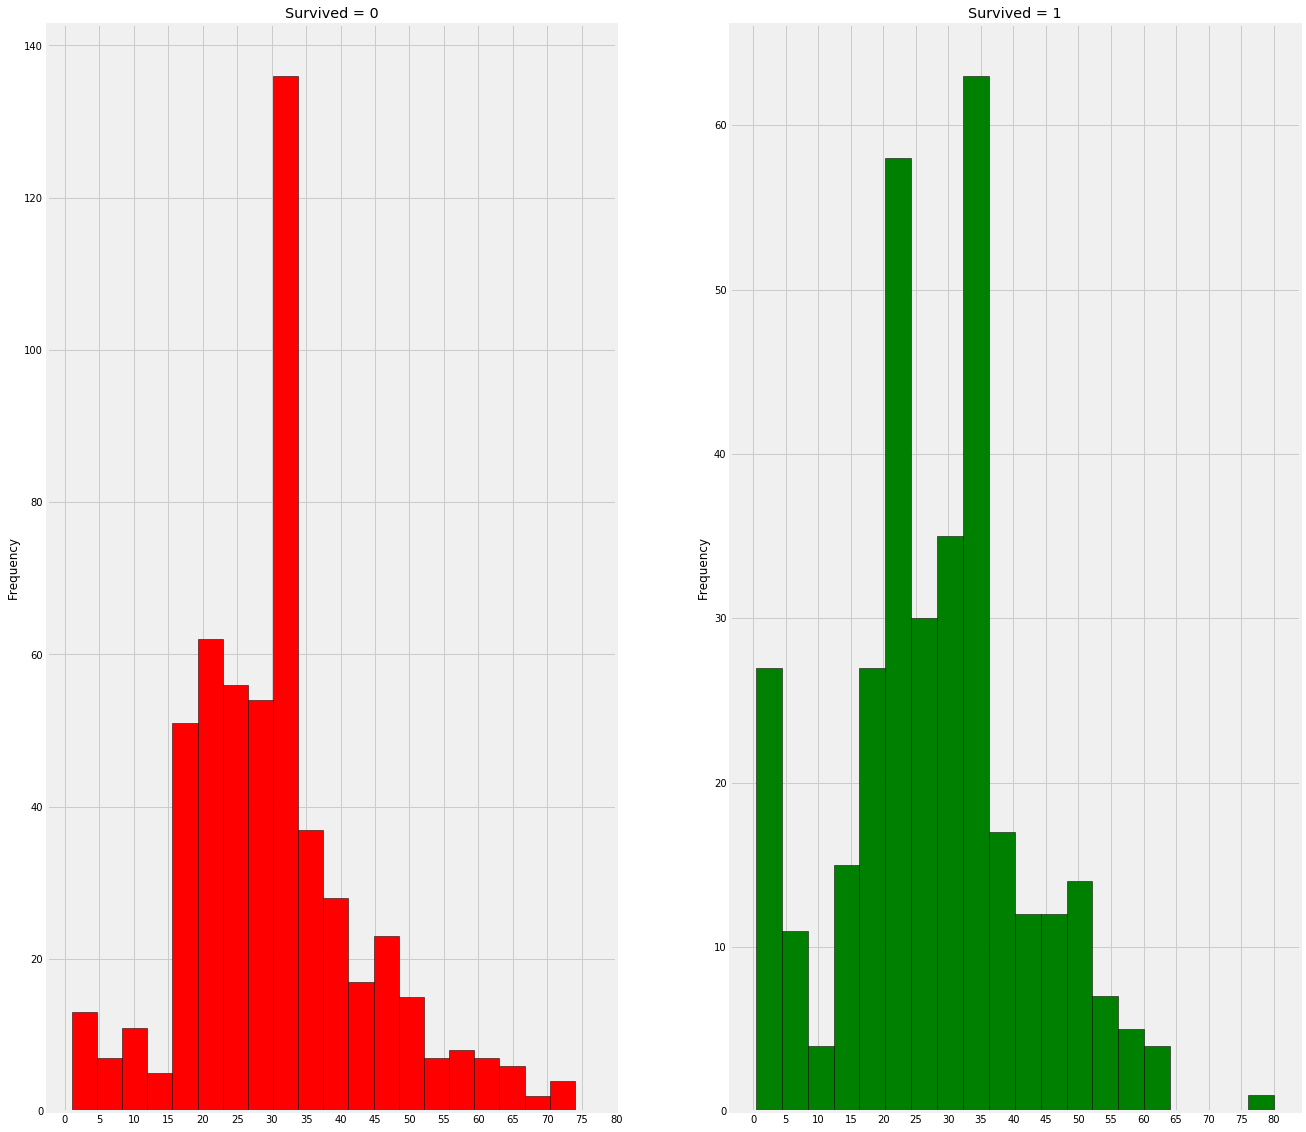

In [113]:
f,ax=plt.subplots(1,2,figsize=(20,20))
train_data[train_data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived = 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
train_data[train_data['Survived']==1].Age.plot.hist(ax=ax[1],bins=20,edgecolor='black',color='green')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
ax[1].set_title('Survived = 1')
plt.show()

From the above plots, I found the following observations


(1) First priority during Rescue is given to children and women, as the persons<5 are save by large numbers
(2) The oldest saved passanger is of 80
(3) The most deaths were between 30-40

In [114]:
train_data[train_data['Title']=='Other'].count()

PassengerId    9
Survived       9
Pclass         9
Name           9
Sex            9
Age            9
SibSp          9
Parch          9
Ticket         9
Fare           9
Cabin          1
Embarked       9
Title          9
LastName       9
First          9
dtype: int64

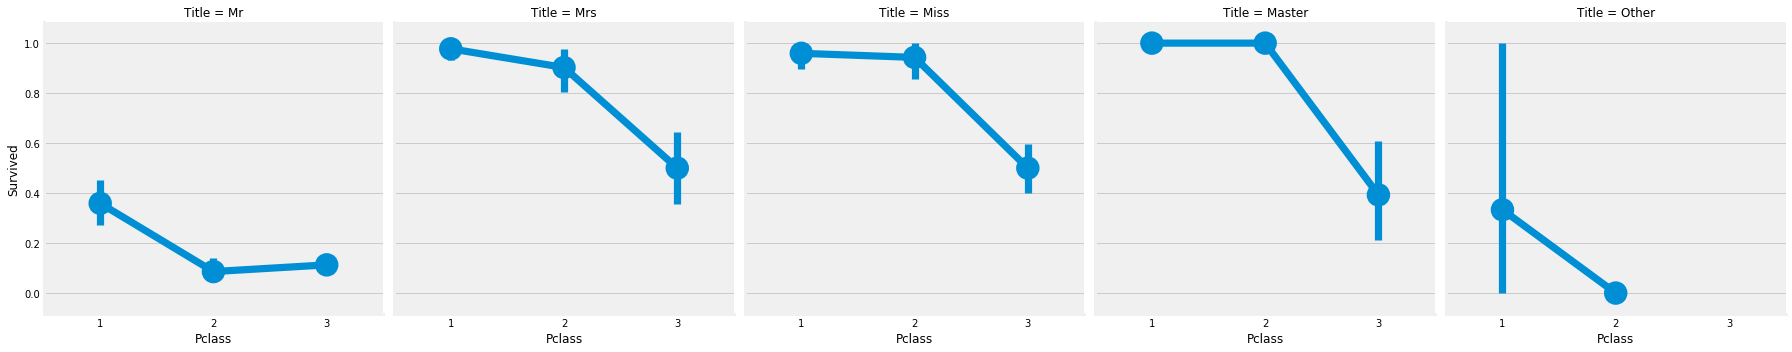

In [115]:
sb.factorplot('Pclass','Survived',col='Title',data=train_data)
plt.show()

From the above FactorPlots it is Clearly seen that women and children were saved irrespective of PClass

Let's explore some more

# Feature: SibSip

SibSip feature indicates that whether a person is alone or with his family. Siblings=brother,sister, etc
and Spouse= husband,wife

In [117]:
pd.crosstab([train_data.SibSp, train_data.Pclass],train_data.Survived).style.background_gradient('summer_r')

In [105]:
pd.crosstab([train_data.SibSp],train_data['Pclass']).style.background_gradient('summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


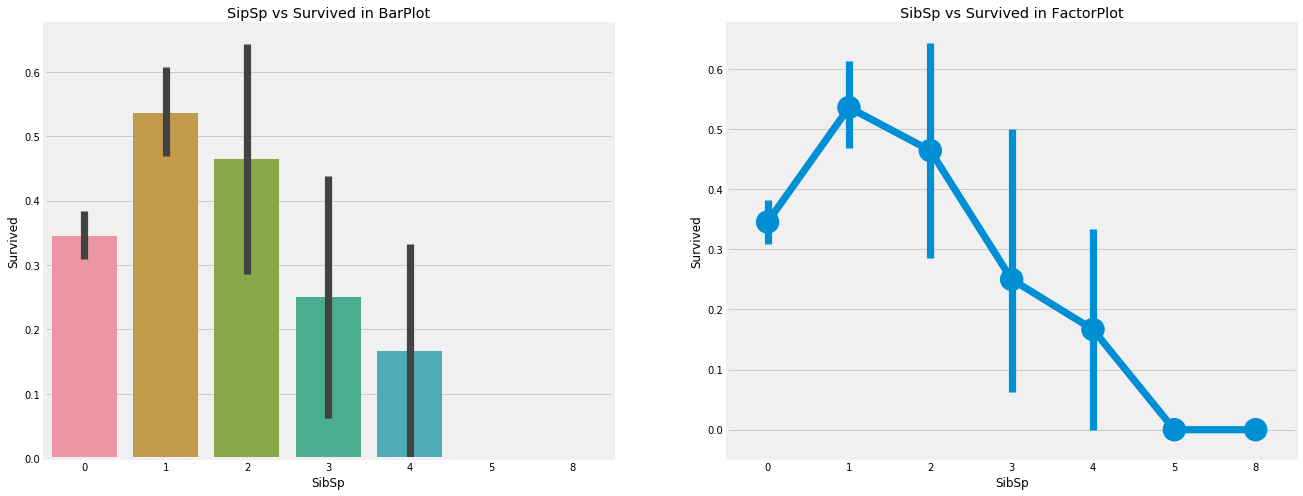

In [106]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sb.barplot('SibSp','Survived', data=train_data,ax=ax[0])
ax[0].set_title('SipSp vs Survived in BarPlot')
sb.factorplot('SibSp','Survived', data=train_data,ax=ax[1])
ax[1].set_title('SibSp vs Survived in FactorPlot')
plt.close(2)
plt.show()

In [44]:
pd.crosstab(train_data.SibSp,train_data.Pclass).style.background_gradient('summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


There are many interesting facts with this feature. Barplot and FactorPlot shows that if a passanger is alone in ship with no siblings, survival rate is 34.5%. The graph decreases as no of siblings increase. This is interesting because, If I have a family onboard, I will save them instead of saving myself. But there's something wrong, the survival rate for families with 5-8 members is 0%. Is this because of PClass?
Yes this is PClass,  The crosstab shows that Person with SibSp>3 were all in Pclass3. It is imminent that all the large families in Pclass3(>3) died.

That are some interesting facts we have observed with Titanic dataset.

In [ ]:
# Classwork
# Find out the youngest 3rd class passanger to survive.
# How about the average of all 1st class passangers to survive
# plot histogram of all 2nd class passengers separated by gender, colored by survival
# did the most expensive ticket survive
# plot 10 most expensive ticket holders

In [120]:
survivors = train_data[train_data['Survived'] == 1]
len(survivors)

342

In [121]:
lived_3 = survivors[survivors['Pclass']  == 3]
len(lived_3)

119

In [122]:
lived_3.sort_values(by='Age').head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,LastName,First
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C,Master,Thomas,Assad
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C,Miss,Baclini,Helene
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C,Miss,Baclini,Eugenie
381,382,1,3,"Nakid, Miss. Maria (""Mary"")",female,1.00,0,2,2653,15.7417,NaN,C,Miss,Nakid,Maria
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.00,1,1,347742,11.1333,NaN,S,Miss,Johnson,Eleanor


In [124]:
df = train_data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,LastName,First
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Braund,Owen
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Cumings,John
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Heikkinen,Laina
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Futrelle,Jacques
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Allen,William


In [125]:
df3 = df[(df["Pclass"] == 3) & (df['Survived'] == 1)]
df3.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,LastName,First
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Heikkinen,Laina
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs,Johnson,Oscar
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,Miss,Sandstrom,Marguerite
19,20,1,3,"Masselmani, Mrs. Fatima",female,36.0,0,0,2649,7.2250,NaN,C,Mrs,Masselmani,Fatima
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q,Miss,McGowan,Anna


In [112]:
df[(df["Pclass"] == 1) & (df['Survived'] == 1)].mean()

PassengerId    491.772059
Survived         1.000000
Pclass           1.000000
Age             35.220000
SibSp            0.492647
Parch            0.389706
Fare            95.608029
dtype: float64

In [128]:
df[(df["Pclass"] == 1) & (df['Survived'] == 1)]['Age'].mean()

35.22

In [129]:
df[(df["Pclass"] == 1) & (df['Survived'] == 1)][['Age','Fare']].mean()

Age     35.220000
Fare    95.608029
dtype: float64

In [130]:
p1 = df[(df["Pclass"] == 1) & (df['Survived'] == 1)]
len(p1)

136

In [133]:
p1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'LastName',
       'First'],
      dtype='object')

In [132]:
p1[[col for col in p1.columns if "S" in col]].mean()

Survived    1.000000
SibSp       0.492647
dtype: float64

In [134]:
richSurvivors = df[(df["Pclass"] == 1) & (df['Survived'] == 1)]
richSurvivors.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,LastName,First
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Cumings,John
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Futrelle,Jacques
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,Miss,Bonnell,Elizabeth
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S,Mr,Sloper,William
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,36.0,1,0,PC 17569,146.5208,B78,C,Mrs,Spencer,William


In [135]:
richSurvivors.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,136.000000,136.0,136.0,136.000000,136.000000,136.000000,136.000000
mean,491.772059,1.0,1.0,35.220000,0.492647,0.389706,95.608029
std,239.006988,0.0,0.0,13.085719,0.632412,0.690387,85.286820
min,2.000000,1.0,1.0,0.920000,0.000000,0.000000,25.929200
25%,307.750000,1.0,1.0,25.750000,0.000000,0.000000,50.985450
50%,510.500000,1.0,1.0,35.000000,0.000000,0.000000,77.958300
75%,693.500000,1.0,1.0,43.250000,1.000000,1.000000,111.481225
max,890.000000,1.0,1.0,80.000000,3.000000,2.000000,512.329200


In [136]:
df[df['Age'] == df3['Age'].min()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,LastName,First
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C,Master,Thomas,Assad


In [137]:
df2 = df[df['Survived'] == 1]
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,LastName,First
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Cumings,John
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Heikkinen,Laina
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Futrelle,Jacques
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs,Johnson,Oscar
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs,Nasser,Nicholas


In [138]:
dsecond = df[df['Pclass'] == 2]
dsecond.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,LastName,First
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs,Nasser,Nicholas
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S,Mrs,Hewlett,NaN
17,18,1,2,"Williams, Mr. Charles Eugene",male,33.0,0,0,244373,13.0000,NaN,S,Mr,Williams,Charles
20,21,0,2,"Fynney, Mr. Joseph J",male,35.0,0,0,239865,26.0000,NaN,S,Mr,Fynney,Joseph
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S,Mr,Beesley,Lawrence


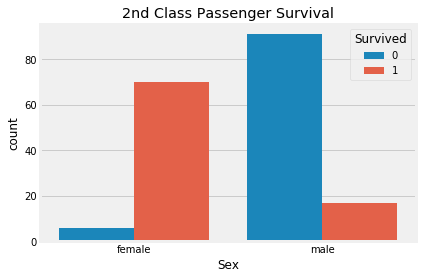

In [139]:
sb.countplot('Sex', hue='Survived', data=dsecond)
plt.title('2nd Class Passenger Survival')
plt.show()

In [140]:
expensive = df.sort_values(['Fare','Survived'],ascending=[False,False])
expensive.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,LastName,First
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,Miss,Ward,Anna
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Mr,Cardeza,Thomas
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,Mr,Lesurer,Gustave
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,Miss,Fortune,Mabel
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S,Miss,Fortune,Alice
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,Mr,Fortune,Charles
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S,Mr,Fortune,Mark
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,Miss,Ryerson,Emily
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,Miss,Ryerson,Susan
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C,Mrs,Baxter,James


In [141]:
expensive.head(50)['Survived'].unique()

array([1, 0], dtype=int64)

In [142]:
expensive.head(50)['Survived'].mean()
# so 76 percent of richest ticket holders survived

0.76

In [144]:
freeloaders = df[df['Fare'] == 0]
len(freeloaders)

15

In [145]:
freeloaders

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,LastName,First
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S,Mr,Leonard,Lionel
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,Mr,Harrison,William
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S,Mr,Tornquist,William
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,33.0,0,0,239853,0.0,NaN,S,Mr,Parkes,Francis
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S,Mr,Johnson,William
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,33.0,0,0,239853,0.0,NaN,S,Mr,Cunningham,Alfred
466,467,0,2,"Campbell, Mr. William",male,33.0,0,0,239853,0.0,NaN,S,Mr,Campbell,William
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,33.0,0,0,239854,0.0,NaN,S,Mr,Frost,Anthony
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S,Mr,Johnson,Alfred
633,634,0,1,"Parr, Mr. William Henry Marsh",male,33.0,0,0,112052,0.0,NaN,S,Mr,Parr,William


In [156]:
df.Ticket.describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [158]:
def getByTicket(df, tnum):
    return df[df['Ticket'] == str(tnum)]

In [159]:
bigfam = getByTicket(df, 347082)
bigfam

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,LastName,First
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.275,NaN,S,Mr,Andersson,Anders
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.275,NaN,S,Miss,Andersson,Ellis
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.275,NaN,S,Miss,Andersson,Ingeborg
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.275,NaN,S,Miss,Andersson,Sigrid
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.275,NaN,S,Mrs,Andersson,Anders
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.275,NaN,S,Miss,Andersson,Ebba
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.275,NaN,S,Master,Andersson,Sigvard


In [154]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Title           object
LastName        object
First           object
dtype: object

In [153]:
ticket = df[df['Ticket'] == '239856']
ticket

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,LastName,First
674,675,0,2,"Watson, Mr. Ennis Hastings",male,33.0,0,0,239856,0.0,NaN,S,Mr,Watson,Ennis


In [146]:
expensive.tail(50)['Survived'].mean()

0.06

In [148]:
# So i get first 50 rows, and first 3 columns by iloc
expensive.iloc[:50,:3]

,PassengerId,Survived,Pclass
258,259,1,1
679,680,1,1
737,738,1,1
88,89,1,1
341,342,1,1
27,28,0,1
438,439,0,1
311,312,1,1
742,743,1,1
299,300,1,1


In [149]:
expensive.iloc[-65:-15,]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,LastName,First
60,61,0,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C,Mr,Sirayanian,Orsen
296,297,0,3,"Hanna, Mr. Mansour",male,23.5,0,0,2693,7.2292,NaN,C,Mr,Hanna,Mansour
352,353,0,3,"Elias, Mr. Tannous",male,15.0,1,1,2695,7.2292,NaN,C,Mr,Elias,Tannous
524,525,0,3,"Kassem, Mr. Fared",male,33.0,0,0,2700,7.2292,NaN,C,Mr,Kassem,Fared
531,532,0,3,"Toufik, Mr. Nakli",male,33.0,0,0,2641,7.2292,NaN,C,Mr,Toufik,Nakli
532,533,0,3,"Elias, Mr. Joseph Jr",male,17.0,1,1,2690,7.2292,NaN,C,Mr,Elias,Joseph
568,569,0,3,"Doharr, Mr. Tannous",male,33.0,0,0,2686,7.2292,NaN,C,Mr,Doharr,Tannous
798,799,0,3,"Ibrahim Shawah, Mr. Yousseff",male,30.0,0,0,2685,7.2292,NaN,C,Mr,Shawah,Yousseff
832,833,0,3,"Saad, Mr. Amin",male,33.0,0,0,2671,7.2292,NaN,C,Mr,Saad,Amin
859,860,0,3,"Razi, Mr. Raihed",male,33.0,0,0,2629,7.2292,NaN,C,Mr,Razi,Raihed


In [150]:
expensive.iloc[-65:-15,]['Survived'].mean()

0.1

In [151]:
# if I know index I can acces column directly
expensive.iloc[-65:-15,1].mean()

0.1

In [161]:
rich50 = expensive.head(50)
rich50.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,LastName,First
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,Miss,Ward,Anna
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Mr,Cardeza,Thomas
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,Mr,Lesurer,Gustave
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,Miss,Fortune,Mabel
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S,Miss,Fortune,Alice


In [162]:
rich50survivors = rich50[rich50['Survived'] == 1]
rich50survivors.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,38.000000,38.0,38.0,38.000000,38.000000,38.000000,38.000000
mean,467.447368,1.0,1.0,31.629474,0.684211,0.789474,193.166116
std,224.863526,0.0,0.0,12.967474,0.841661,0.874809,107.447442
min,32.000000,1.0,1.0,0.920000,0.000000,0.000000,108.900000
25%,307.250000,1.0,1.0,22.000000,0.000000,0.000000,123.412500
50%,386.000000,1.0,1.0,35.000000,0.500000,0.500000,151.550000
75%,698.250000,1.0,1.0,39.750000,1.000000,2.000000,227.525000
max,857.000000,1.0,1.0,58.000000,3.000000,2.000000,512.329200


In [163]:
# find three youngest
df.sort_values("Age").head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,LastName,First
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C,Master,Thomas,Assad
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S,Master,Hamalainen,Viljo
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C,Miss,Baclini,Eugenie
